In [1]:
import tensorflow as tf; print(tf.__version__)

1.13.1


In [2]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{}

In [3]:
#Read in CSV files
import pandas as pd
import numpy as np

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #Add flipped data
        flip_0 = np.flip(df.values[0].reshape((8,8)), 0)
        flip_0_1 = np.flip(flip_0, 1)
        data.append(flip_0.reshape(64))
        data.append(flip_0_1.reshape(64))
        flip_1 = np.flip(df.values[0].reshape((8,8)), 1)
        data.append(flip_1.reshape(64))
        #create noisy data
        noise_level = 0.5
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        noise_level = 0.5
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(0, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        #add labels - for original and flipped
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
    #add label name    
    label_names.append(key)
    #count numver of classes
    index += 1



ImportError: No module named 'pandas'

In [4]:
np.random.normal(0, 0.5, df.values[0].shape)


array([ 1.99658682e-01, -1.13385791e-01, -9.65393116e-01,  3.07640188e-01,
       -6.29327412e-02, -1.85917384e-01, -4.82098791e-01, -6.56906699e-01,
        2.17045789e-01, -1.88504113e-01, -1.53487659e-06,  7.58009100e-01,
        5.06824507e-01, -1.59152182e-01, -5.87137270e-01,  5.32147205e-01,
       -8.69421813e-01, -3.23435790e-01, -1.44624559e-02,  8.38873373e-01,
       -8.86564931e-01,  1.27518512e-01,  1.82868122e-01,  3.82118028e-01,
       -4.17043980e-01, -6.75410158e-01,  2.09812246e-01, -7.82144450e-01,
        1.08312604e-01, -3.48543719e-01,  4.29203511e-01, -1.09120211e+00,
       -3.81743015e-01, -4.83618502e-02,  2.04826558e-02, -1.39774499e-01,
        3.55252427e-02, -4.88508569e-01, -3.17894129e-01, -3.61321998e-01,
        2.41584651e-01,  3.31397822e-02, -1.25236675e-01, -1.09154350e-01,
       -2.19578158e-01, -1.33760060e+00,  3.20305053e-01, -2.54612803e-02,
        7.28099980e-01, -6.72381868e-01,  5.26999377e-01,  4.46390127e-02,
       -2.70558971e-01,  

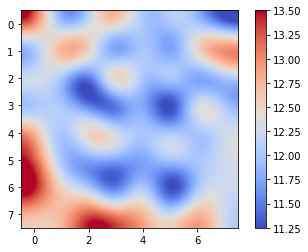

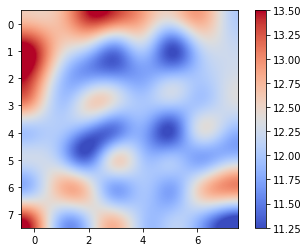

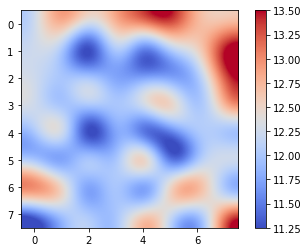

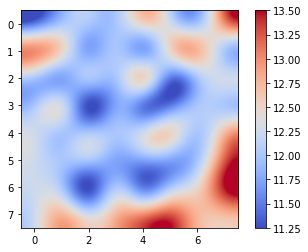

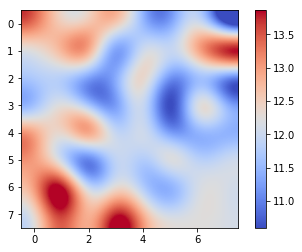

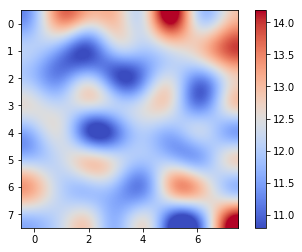

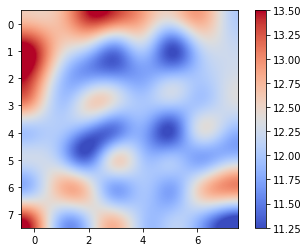

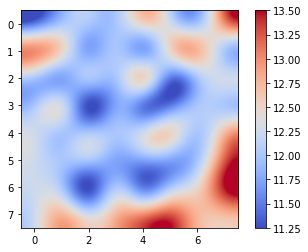

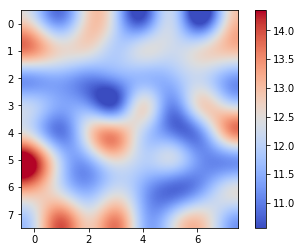

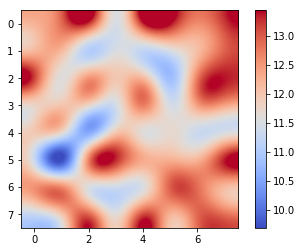

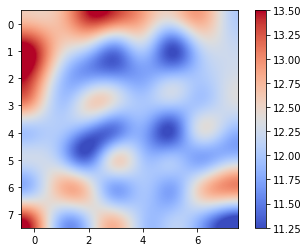

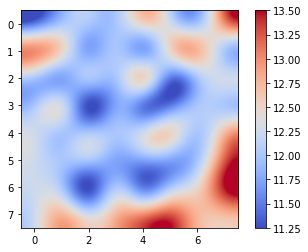

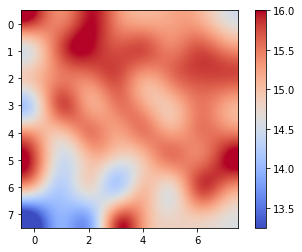

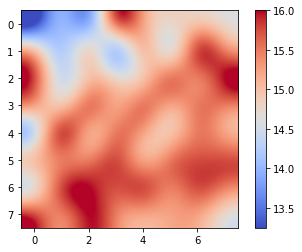

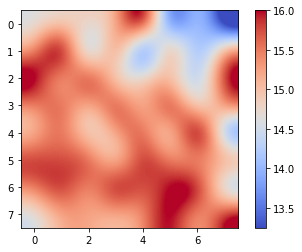

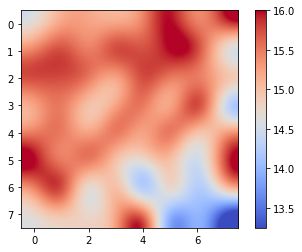

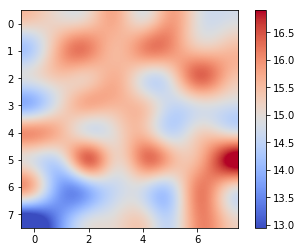

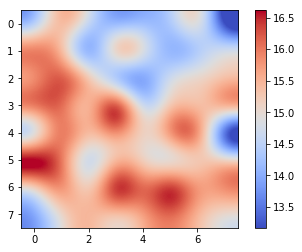

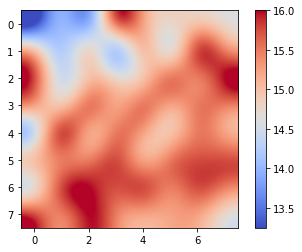

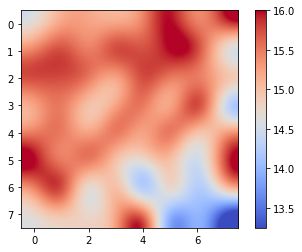

In [5]:
#Print test images
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(744,764):
    plt.imshow(data[i].reshape((8,8)), cmap='coolwarm', interpolation='lanczos')
    plt.colorbar()
    plt.show()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,18.75,18.5,18.75,19.0,18.5,19.25,18.75,19.25,18.0,19.25,...,19.5,19.25,18.5,18.75,18.75,19.0,18.5,19.0,19.75,19.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [8]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler_model, scaler_filename) 

['scaler.save']

In [9]:
print(data.shape)
data

(11292, 64)


array([[0.53538652, 0.60405113, 0.58490644, ..., 0.81393706, 0.94683832,
        0.85302416],
       [0.68872252, 0.65293588, 0.62687915, ..., 0.59686363, 0.60401755,
        0.56489026],
       [0.81417925, 0.94624435, 0.78077908, ..., 0.59686363, 0.60401755,
        0.56489026],
       ...,
       [0.47629883, 0.5528948 , 0.5602877 , ..., 0.52055574, 0.51093089,
        0.542355  ],
       [0.46568834, 0.53887147, 0.52894283, ..., 0.56585314, 0.53871836,
        0.53607687],
       [0.50750725, 0.53887147, 0.55692463, ..., 0.53484265, 0.53871836,
        0.49285679]])

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



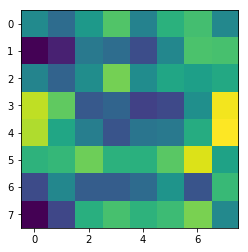

In [11]:
img = X_train[0].reshape((8,8))
img = np.flip(img, 0)
plt.imshow(img)

In [12]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, Reshape, Conv2D, MaxPooling2D

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(Dropout(0.025))
model.add(Reshape((8, 8, 1), input_shape=(64,)))
model.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(8,8,1)))
model.add(Dropout(0.05))
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(8,8,1)))
model.add(Dropout(0.05))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(8,8,1)))
model.add(Dropout(0.05))
# model.add(Conv2D(32, kernel_size=4, activation='relu', input_shape=(8,8,1)))
# model.add(Dropout(0.05))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.025));
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.025));
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.05))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.05))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.05))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2));
model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# model.layers[0].trainable = False

In [13]:
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:

#data
model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
#         validation_steps=1,
#         steps_per_epoch=10,
        epochs=100,
        callbacks=[tensorboard])


Train on 10162 samples, validate on 1130 samples
Epoch 1/100
10162/10162 [==============================] - 2s 241us/step - loss: 0.6348 - acc: 0.6613 - val_loss: 0.6589 - val_acc: 0.6549
Epoch 2/100
10162/10162 [==============================] - 2s 209us/step - loss: 0.5580 - acc: 0.6985 - val_loss: 0.4728 - val_acc: 0.7416
Epoch 3/100
10162/10162 [==============================] - 2s 220us/step - loss: 0.4826 - acc: 0.7438 - val_loss: 0.4181 - val_acc: 0.7814
Epoch 4/100
10162/10162 [==============================] - 2s 226us/step - loss: 0.4252 - acc: 0.7974 - val_loss: 0.3543 - val_acc: 0.8398
Epoch 5/100
10162/10162 [==============================] - 2s 228us/step - loss: 0.3736 - acc: 0.8341 - val_loss: 0.2836 - val_acc: 0.8858
Epoch 6/100
10162/10162 [==============================] - 2s 222us/step - loss: 0.3481 - acc: 0.8479 - val_loss: 0.2810 - val_acc: 0.8903
Epoch 7/100
10162/10162 [==============================] - 2s 223us/step - loss: 0.3316 - acc: 0.8544 - val_loss: 0.2

In [19]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test))
print(model.evaluate(X_train, y_train))


['loss', 'acc']
1130/1130 [==============================] - 0s 64us/step
[0.12362110912799835, 0.9557522123893806]
10162/10162 [==============================] - 0s 44us/step
[0.09178016439763563, 0.9640818736469199]


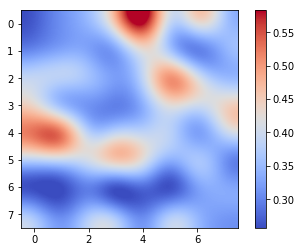

Should be: pee
['dry', 'pee']
[[5.869320e-07 9.999994e-01]]
Prediction: pee


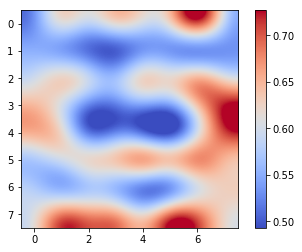

Should be: pee
['dry', 'pee']
[[0.95025826 0.0497418 ]]
Prediction: dry


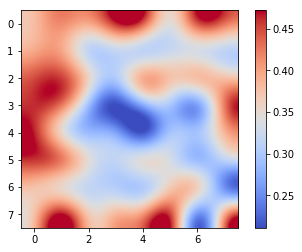

Should be: pee
['dry', 'pee']
[[1.8699444e-06 9.9999809e-01]]
Prediction: pee


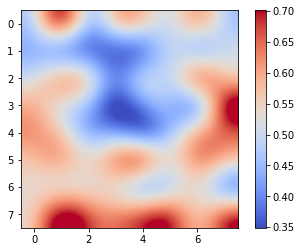

Should be: pee
['dry', 'pee']
[[9.0364944e-07 9.9999905e-01]]
Prediction: pee


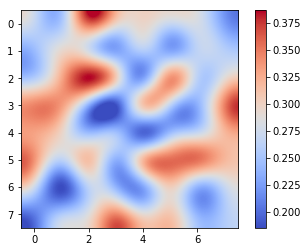

Should be: dry
['dry', 'pee']
[[0.99538726 0.00461275]]
Prediction: dry


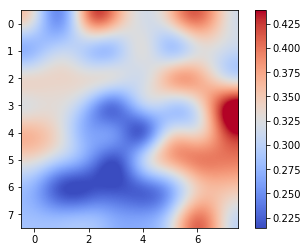

Should be: pee
['dry', 'pee']
[[6.031780e-04 9.993968e-01]]
Prediction: pee


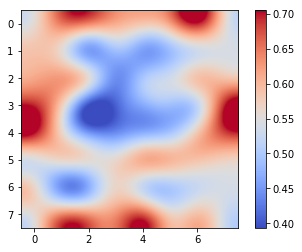

Should be: pee
['dry', 'pee']
[[1.3450264e-05 9.9998653e-01]]
Prediction: pee


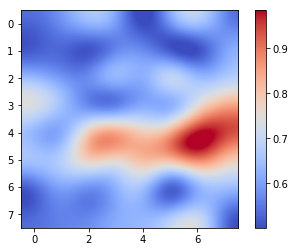

Should be: dry
['dry', 'pee']
[[1.000000e+00 4.170025e-36]]
Prediction: dry


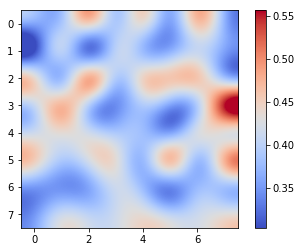

Should be: dry
['dry', 'pee']
[[0.9769017  0.02309827]]
Prediction: dry


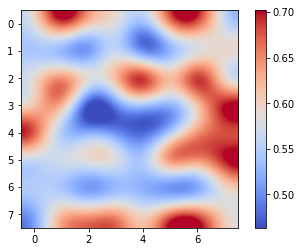

Should be: dry
['dry', 'pee']
[[0.16214506 0.837855  ]]
Prediction: pee


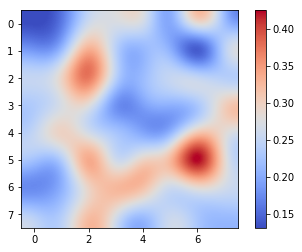

Should be: pee
['dry', 'pee']
[[0.01557629 0.9844237 ]]
Prediction: pee


In [16]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)), cmap='coolwarm', interpolation='lanczos')
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 


In [17]:
type(X_test[0:0+1])
X_test[0:0+1].shape
type(X_test[0:0+1][0])

numpy.ndarray

In [18]:
#Save the model
model.save("test_model.h5");